<a href="https://colab.research.google.com/github/Sushant6862/Jeremy-Howard-Squadron-/blob/main/Naive_Bayes_Therom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris (1).csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# data.rename(columns={'SepalLengthCm': 'sepal_length', 'SepalWidthCm': 'sepal_width',
#                       'PetalLengthCm': 'petal_length', 'PetalWidthCm': 'petal_width'}, inplace=True)


In [ ]:
data.shape

(150, 6)

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
label_encoder = LabelEncoder()

data['Species'] = label_encoder.fit_transform(data['Species'])

<Axes: >

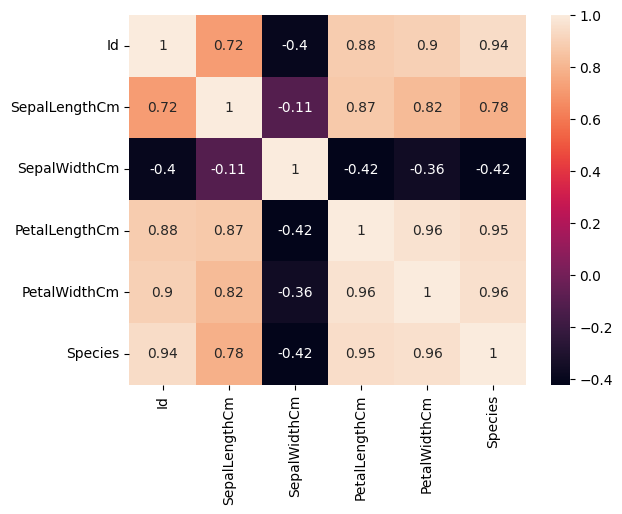

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
# df = data.drop_duplicates(subset ="Species",)
# df

In [ ]:
# data.value_counts("Species")

In [ ]:
# sns.countplot(x='Species', data=df, )
# plt.show()

In [ ]:
X = data[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [ ]:
# X = data.drop(columns = 'Species')
# y = data['Species']

In [ ]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

# Fit and compare all versions of Naive Bayes classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")




GaussianNB Accuracy: 1.00
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30


In [ ]:
# Tweak hyperparameters and compare results
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]
for alpha in alpha_values:
    print(f"Alpha value: {alpha}")
    for name, clf in classifiers.items():
        if name != 'GaussianNB':  # Exclude GaussianNB (Naive Bayes classifiers, GaussianNB does not have an alpha parameter.)
            clf.set_params(alpha=alpha)  # Set alpha parameter
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"{name} Accuracy: {accuracy:.2f}")
    print()


Alpha value: 0.1
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30

Alpha value: 0.5
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30

Alpha value: 1.0
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30

Alpha value: 1.5
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30

Alpha value: 2.0
MultinomialNB Accuracy: 0.93
ComplementNB Accuracy: 0.70
BernoulliNB Accuracy: 0.30



## SVM

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store classifiers
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classifiers = {}

# Fit and compare all versions of SVM classifier
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifiers[kernel] = clf
    print(f"{kernel} SVM Accuracy: {accuracy:.2f}")

# Tweak hyperparameters and compare results
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']
for C in C_values:
    for gamma in gamma_values:
        print(f"\nC value: {C}, Gamma value: {gamma}")
        for kernel, clf in classifiers.items():
            clf.set_params(C=C, gamma=gamma)  # Set C and gamma parameters
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"{kernel} SVM Accuracy: {accuracy:.2f}")


linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.13

C value: 0.1, Gamma value: scale
linear SVM Accuracy: 1.00
poly SVM Accuracy: 0.90
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.43

C value: 0.1, Gamma value: auto
linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 0.30
sigmoid SVM Accuracy: 0.30

C value: 1, Gamma value: scale
linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.13

C value: 1, Gamma value: auto
linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.30

C value: 10, Gamma value: scale
linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.13

C value: 10, Gamma value: auto
linear SVM Accuracy: 1.00
poly SVM Accuracy: 1.00
rbf SVM Accuracy: 1.00
sigmoid SVM Accuracy: 0.30
